# Homework1
### B08705038 資管四 郭子麟

## Question1 - myknn_regressor

### Q1.1 Create your myknn_regressor based on the skeleton

In [7]:
# loading basic packages
import pickle
from sklearn import preprocessing
import numpy as np

In [8]:
# implement my_knn class
class my_knn_regressor:
  def __init__(self, n_neighbors = 10, mean_type = "equal_weight"):
    """
    mean_type can be equal_weight or remove_outliers.
    equal_weight use the same weight for all neighbors.
    remove_outliers remove neighbors out in [Q1 - 1.5 IQR, Q3 + 1.5IQR].
    """
    self.n_neighbors = n_neighbors
    self.mean_type = mean_type
    # if n_neighbors is less than 10, use equal_weight anyway
    if n_neighbors < 10:
      self.mean_type = "equal_weight"
    
  def fit(self, x_train, y_train):
    """
    x_train: numpy array of shape (n_samples, n_features)
    y_train: numpy array of shape (n_samples, )
    """
    self.x_train = x_train
    self.y_train = y_train
  def predict(self, x_test):
    """
    x_test: numpy array of shape (n_samples, n_features)
    return: numpy array of shape (n_samples, )
    """
    # get the number of samples
    n_samples = x_test.shape[0]
    # initialize the prediction array
    y_pred = np.zeros(n_samples)
    # for each sample in x_test
    for i in range(n_samples):
      # get the distance between x_test[i] and all samples in x_train
      # 因為每個 sample 都會跟全部的 x_train 計算距離，所以這邊用 broadcasting
      dist = np.sqrt(np.sum((x_test[i] - self.x_train)**2, axis = 1))
      # get the index of the n_neighbors smallest distance
      # kind = "stable" 代表當距離相同時，會保留原本的順序
      idx = np.argsort(dist, kind='stable')[:self.n_neighbors]
      # get the corresponding y_train
      y = self.y_train[idx]
      # if mean_type is equal_weight
      if self.mean_type == "equal_weight":
        # get the mean of y
        y_pred[i] = np.mean(y)
      # if mean_type is remove_outlier
      else:
        # get the Q1 and Q3
        Q1 = np.percentile(y, 25)
        Q3 = np.percentile(y, 75)
        # get the IQR
        IQR = Q3 - Q1
        # get the index of y in [Q1 - 1.5 IQR, Q3 + 1.5IQR]
        idx = np.where((y >= Q1 - 1.5 * IQR) & (y <= Q3 + 1.5 * IQR))
        # get the corresponding y_train
        y = y[idx]
        # get the mean of y
        y_pred[i] = np.mean(y)
    return y_pred

### Q1.2 Load data, fit, predict and list the RMSE and the first 20 predictions in the test data

#### Load data

In [9]:
# Load data
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

doscaling = 1

if (doscaling == 1):
    xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
    #standardize feature values
    X_train = xscaler.transform(msd_data['X_train'])
    X_test = xscaler.transform(msd_data['X_test'])
else:
    X_train = msd_data['X_train']
    X_test = msd_data['X_test']

Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

#### Initialize my_knn_regressor, fit the model and predict the outcome

In [10]:
my_knn = my_knn_regressor(n_neighbors = 20, mean_type = "equal_weight")
my_knn.fit(X_train, Y_train)
Y_pred = my_knn.predict(X_test)

#### List the RMSE and first 20 predictions in the testing data

In [11]:
print(f"RMSE is {np.sqrt(np.mean((Y_pred - Y_test)**2))}")
print(f"The first 20 predictions are {Y_pred[:20]}")

RMSE is 10.25126451549596
The first 20 predictions are [1993.35 1993.8  2000.65 1991.5  1992.8  1998.5  1988.1  1991.65 2002.25
 2003.   2000.5  1998.65 1995.55 1997.2  1995.05 1997.4  1992.15 2000.45
 2003.2  1995.75]


### Q1.3 Use remove_outlier to get the prediction and calculate the RMSE and list the first 20 predictions.

#### Initialize my_knn_regressor, fit the model and predict the outcome

In [13]:
my_knn = my_knn_regressor(n_neighbors = 20, mean_type = "remove_outlier")
my_knn.fit(X_train, Y_train)
Y_pred_with_remove_outlier = my_knn.predict(X_test)
Y_pred_with_remove_outlier

array([1993.35      , 1993.8       , 2000.65      , ..., 2002.94117647,
       2002.6       , 1994.25      ])

#### List the RMSE and first 20 predictions in the testing data

In [14]:
rmse = np.sqrt(np.mean((Y_pred_with_remove_outlier - Y_test)**2))
print(f"RMSE with remove outlier method is {rmse}")
print(f"The first 20 predictions are {Y_pred_with_remove_outlier[:20]}")

RMSE with remove outlier method is 10.212572466080376
The first 20 predictions are [1993.35       1993.8        2000.65       1992.73684211 1992.8
 2000.         1988.1        1991.65       2002.25       2003.94736842
 2000.5        2000.94444444 1995.55       1997.2        1998.61111111
 1997.4        1992.15       2003.83333333 2003.2        1995.75      ]


## Question2 - Tuning the Hyper-Parameter

In [15]:
from sklearn.neighbors import KNeighborsRegressor

# define candidate neighbors list
candidate_k_list = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200]

# rmse list for three settings
first_rmse_list = []
second_rmse_list = []
third_rmse_list = []

# setup data with / without feature scaling
# Load data
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
# standardize feature values
X_train_feature_scaling = xscaler.transform(msd_data['X_train'])
X_test_feature_scaling = xscaler.transform(msd_data['X_test'])


X_train = msd_data['X_train']
X_test = msd_data['X_test']

Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']


# for each candidate k, train the model and get the rmse
for k in candidate_k_list:
  # setting 1: use KNeighbors with feature scaling data
  knn_1 = KNeighborsRegressor(n_neighbors = k)
  knn_1.fit(X_train_feature_scaling, Y_train)
  Y_pred_1 = knn_1.predict(X_test_feature_scaling)
  first_rmse_list.append(np.sqrt(np.mean((Y_pred_1 - Y_test)**2)))

  # setting 2: use KNeighbors with original data
  knn_2 = KNeighborsRegressor(n_neighbors = k)
  knn_2.fit(X_train, Y_train)
  Y_pred_2 = knn_2.predict(X_test)
  second_rmse_list.append(np.sqrt(np.mean((Y_pred_2 - Y_test)**2)))

  # setting 3: use my_knn_regressor with feature scaling data
  knn_3 = my_knn_regressor(n_neighbors = k, mean_type = "remove_outlier")
  knn_3.fit(X_train_feature_scaling, Y_train)
  Y_pred_3 = knn_3.predict(X_test_feature_scaling)
  third_rmse_list.append(np.sqrt(np.mean((Y_pred_3 - Y_test)**2)))

#### For each setting, plot a curve that shows the relations between k (x-axis) and RMSE (y-axis)

Text(0, 0.5, 'RMSE')

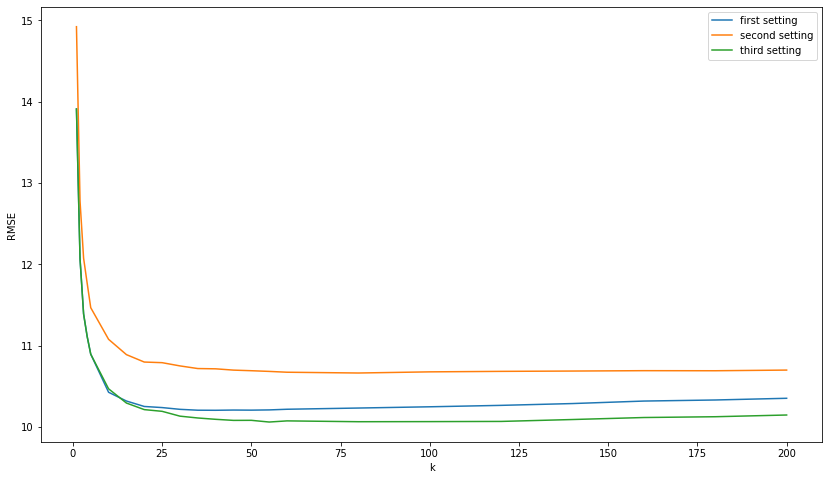

In [16]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [14, 8]
plt.plot(candidate_k_list, first_rmse_list, label = "first setting")
plt.plot(candidate_k_list, second_rmse_list, label = "second setting")
plt.plot(candidate_k_list, third_rmse_list, label = "third setting")
plt.legend()
plt.xlabel("k")
plt.ylabel("RMSE")


#### Observations
1. 當都使用 `sklearn.neighbors.KNeighborsRegressor` 時，有先將 feautre values standardize (first & third setting) 的表現明顯比不使用 feature scaling (second setting) 的情況來得好
2. remove outliers 這件事情在 `K` 越來越大時能看出使用 (third setting) 與不使用 (first setting) 的差異，也就是因為在 `K` 越來越大時，常會在 neighbor list 中有 outliers 的存在，因此適當地剔除這些 outliers 會讓平均較為合理

## Question 3 - Lasso Regression

### Q3.1 基於本題給的 L，推導新的 Coordinate Descent with Soft Thresholding 公式

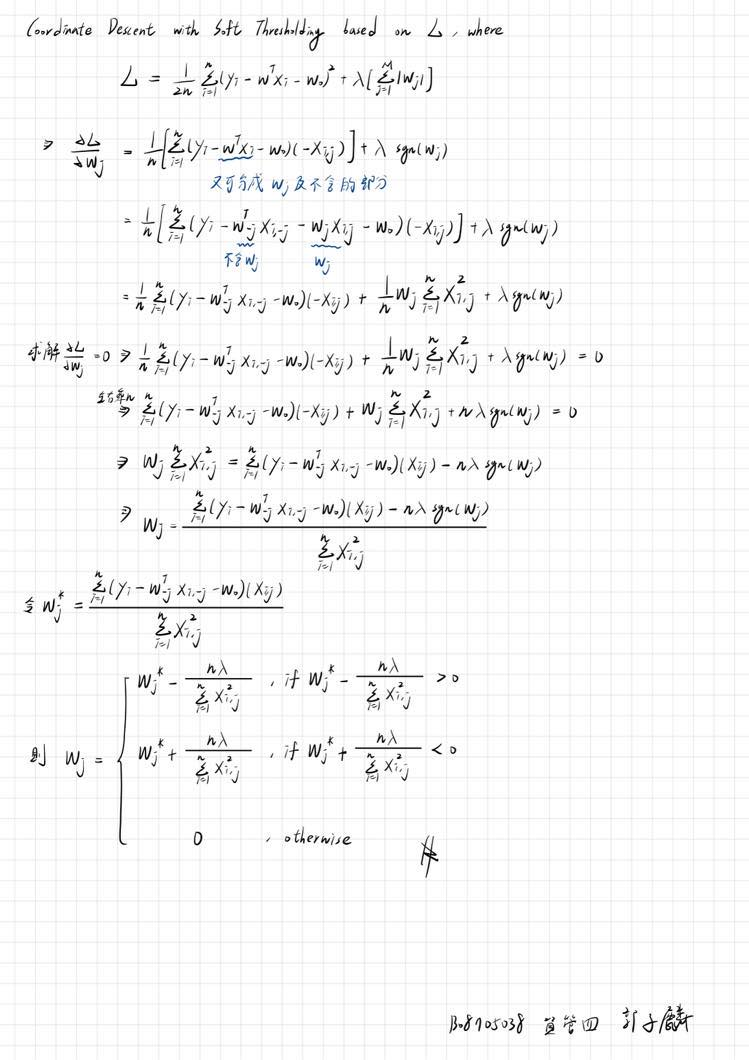

In [1]:
from IPython import display
display.Image("./q3-1_handwriting.jpg")

### Q3.2 使用給定的骨架建構你的 mylasso。

In [2]:
import numpy as np

class mylasso():
  def __init__(self, lamcoef = 0.1, max_iter=1000, tol=1e-6, const_regu = False):
    """lamcoef: the regularization coefficient
        max_iter: maximum number of iteration for model training
        tol: tolerance for the stopping criteria for model training
        const_regu: whether the constant term should be regularized, default to False
        """
    self.lamcoef = lamcoef
    self.max_iter = max_iter
    self.tol = tol
    self.const_regu = const_regu

  def fit(self, x_train, y_train, winit = "ridge", keep_traindata = True, verbose = False):
    """
    Fit a Lasso model
      x_train: a numpy matrix that contains training features. n (number of data points) * M (features)
      y_train: a numpy matrix that contains the label
      winit: how weights are initialized, default to "ridge", ridge regression
      keep_traindata: whether the object is going to keep training data after the training process completed
      verbose: output a lot of message
    """
        
    if keep_traindata:
      self.x_train = x_train
      self.y_train = y_train
    
    # adding a constant column to x_train
    x_train_with_const = np.concatenate((np.ones((x_train.shape[0], 1)), x_train), axis = 1)

    # initialize weights
    if winit == "ridge":
      # use ridge regression to initialize weights
      w_init = np.linalg.inv(x_train_with_const.T.dot(x_train_with_const)).dot(x_train_with_const.T).dot(y_train)
    else:
      # use random initialization
      w_init = np.random.rand(x_train_with_const.shape[1], 1)
    
    self.w = w_init

    w_update_start_index = 0 if self.const_regu else 1

    # initialize loss
    last_loss = np.inf

    for iter_count in range(1, self.max_iter + 1):
      # update weights
      for j in range(w_update_start_index, x_train_with_const.shape[1]):
        # coordinate descent
        self.__update_w(x_train_with_const, y_train, j)

      # calculate loss
      loss = self.__calculate_loss(x_train_with_const, y_train)
      if verbose:
        print(f"iter {iter_count}, loss {loss}")

      if (abs(loss - last_loss) < self.tol):
        print(f"Converged at iteration {iter_count}")
        break
      last_loss = loss
        # check stopping criteria
    
    # store basic information
    self.training_loss = loss
    self.intercept_ = self.w[0]
    self.features = self.w[1:]
  
  def __update_w(self, x_train, y_train, j):
    """update weights"""
    w_without_j = np.delete(self.w, j, axis = 0)
    x_train_without_j = np.delete(x_train, j, axis = 1)

    # const_regu = False 時，w0 不參與 regularization
    w_j_star = np.sum((y_train - x_train_without_j.dot(w_without_j) - self.w[0]).dot(x_train[:, j])) / np.sum(x_train[:, j]**2)
    threshold = x_train.shape[0] * self.lamcoef / np.sum(x_train[:, j]**2)
    if self.const_regu and j == 0:
      w_j_star = np.sum((y_train - x_train_without_j.dot(w_without_j) - 1).dot(x_train[:, j])) / np.sum(x_train[:, j]**2)
      threshold = x_train.shape[0] * (1 + self.lamcoef) / np.sum(x_train[:, j]**2)

    if w_j_star - threshold > 0:
      self.w[j] = w_j_star - threshold
    elif w_j_star + threshold < 0:
      self.w[j] = w_j_star + threshold
    else:
      self.w[j] = 0

  def __calculate_loss(self, x_train, y_train):
    """calculate loss"""
    return np.sum((y_train - x_train.dot(self.w))**2) / (2 * x_train.shape[0]) + self.lamcoef * np.sum(np.abs(self.w[1:]))

  def predict(self, x_test):
    """Make prediction using trained model"""
    x_test_with_const = np.concatenate((np.ones((x_test.shape[0], 1)), x_test), axis = 1)
    return x_test_with_const.dot(self.w)

### Q3.3
載入資料集，並且使用訓練資料計算Lasso Regression的權重，設定lamcoef = 0.1，其他參數使用預設值。列出
* Training Loss
* Root Mean Squared Error (RMSE) in Training Data
* Mean Absolute Error (MAE) in Training Data
* Intercept (截距項)
* Feature Weights (除了截距項的所有權重)
* 非零權重的個數。

為了讓結果容易閱讀，請使用 np.set_printoptions(suppress=True) 關閉 Scientific Notation。

In [3]:
#load the dataset, and create normalized and raw features. 
import pickle
from sklearn import preprocessing
import numpy as np
np.set_printoptions(suppress=True)

#Load data
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
#standardize feature values
X_train_sd = xscaler.transform(msd_data['X_train'])
X_test_sd = xscaler.transform(msd_data['X_test'])

#outcome values
Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

In [4]:
# create my_lasso instance and fit the model
my_lasso = mylasso(lamcoef=0.1)
my_lasso.fit(X_train_sd, Y_train, winit = "ridge")
train_pred = my_lasso.predict(X_train_sd)

Converged at iteration 48


In [5]:
# print basic information
print(f"training loss: {my_lasso.training_loss}")
print(f"RMSE in training data: {np.sqrt(np.sum((train_pred - Y_train)**2) / Y_train.shape[0])}")
print(f"MAE in training data: {np.sum(np.abs(train_pred - Y_train)) / Y_train.shape[0]}")
print(f"intercept: {my_lasso.intercept_}")
print(f"features:")
print(my_lasso.features)
print(f"non-zero features count: {np.sum(my_lasso.features != 0)}")

training loss: 49.888404112521535
RMSE in training data: 9.719499050830489
MAE in training data: 6.980897993419738
intercept: 1998.2660000000005
features:
[ 4.65185495 -2.45673135 -1.06195813  0.         -0.34275079 -2.94854434
  0.         -0.39970284 -0.4265387   0.         -0.23498646 -0.39491054
  0.50307701  0.         -0.34207993  0.61674567  0.15722735  0.43490134
  0.43595387  1.12941736  0.40663478  0.          1.77743614  0.
 -0.16842729  0.07833532  0.66391236  0.01297956  0.15350702  0.
 -0.21762066 -0.2218911   0.         -0.00275479 -0.01707661 -0.259946
  0.          0.28969364  0.34893387  0.         -0.2611257  -0.14488714
 -0.00995262  0.03497715 -0.03984335  0.          0.00299378 -0.17804317
  0.          0.06494386  0.27076496  0.          0.          0.
  0.          0.         -0.63813242  0.23761421 -0.19016395  0.
 -0.18875526  0.         -0.13590668  0.0612754  -0.2661902   0.
  0.          0.         -0.03099171  0.         -0.19276505  0.01221347
  0.2073519

### Q3-4 
使用上一小題的模型計算測試資料的預測值。列出前五筆資料的預測年分、Test RMSE、Test MAE。

In [6]:
Y_pred = my_lasso.predict(X_test_sd)
print(f"first 5 predictions: {Y_pred[:5]}")
print(f"Test RMSE: {np.sqrt(np.sum((Y_pred - Y_test)**2) / Y_test.shape[0])}")
print(f"Test MAE: {np.sum(np.abs(Y_pred - Y_test)) / Y_test.shape[0]}")

first 5 predictions: [1991.93191104 1999.07198604 2001.76293943 1991.30316996 1994.42658027]
Test RMSE: 9.648414812863313
Test MAE: 6.921386006548626


### Q3-5 
使用下面的 λ 訓練模型: 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2。記錄每一個 λ 的 
* Training Loss
* Number of Nonzero Weights
* Average Weight Size (Mean of Absolute Weight)
* Training RMSE、Test RMSE

將所有的結果列表、畫折線圖、並寫下你對結果的觀察。

#### 紀錄各 lambda 結果並存入 dataframe 展示

In [47]:
import pandas as pd
lambda_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2]
columns = ["lambda", "Training Loss", "Nonzero Weights", "Avg Weight Size", "Training RMSE", "Test RMSE"]
result = pd.DataFrame(columns = columns)
data_list = []

for lam in lambda_list:
  my_lasso = mylasso(lamcoef=lam)
  my_lasso.fit(X_train_sd, Y_train, winit = "ridge")
  Y_pred = my_lasso.predict(X_test_sd)
  data_list.append({
    "lambda": lam, 
    "Training Loss": my_lasso.training_loss, 
    "Nonzero Weights": np.sum(my_lasso.features != 0),
    "Avg Weight Size": np.sum(np.abs(my_lasso.features)) / my_lasso.features.shape[0],
    "Training RMSE": np.sqrt(np.sum((my_lasso.predict(X_train_sd) - Y_train)**2) / Y_train.shape[0]), 
    "Test RMSE": np.sqrt(np.sum((Y_pred - Y_test)**2) / Y_test.shape[0])})

result = pd.concat([result, pd.DataFrame(data_list)], ignore_index = True)
result

Converged at iteration 2
Converged at iteration 7
Converged at iteration 14
Converged at iteration 31
Converged at iteration 35
Converged at iteration 33
Converged at iteration 48
Converged at iteration 26
Converged at iteration 14
Converged at iteration 5


,lambda,Training Loss,Nonzero Weights,Avg Weight Size,Training RMSE,Test RMSE
0,0.0001,46.570461,90,0.470606,9.650516,9.644363
1,0.0005,46.587379,90,0.469507,9.650518,9.644092
2,0.001,46.608461,90,0.467906,9.650528,9.643539
3,0.005,46.774657,89,0.455754,9.650862,9.640063
4,0.01,46.976826,87,0.442903,9.651758,9.636408
5,0.05,48.41739,76,0.363977,9.672589,9.626433
6,0.1,49.888404,59,0.294897,9.719499,9.648415
7,0.5,56.375688,16,0.120031,10.096958,9.999131
8,1.0,59.889324,4,0.042175,10.591844,10.474621
9,2.0,61.492131,1,0.004266,11.020374,10.902614


#### 根據各指標繪製折線圖

c:\Users\user\Anaconda3\envs\python39\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


array([[<AxesSubplot:title={'center':'Training Loss'}, xlabel='lambda'>,
        <AxesSubplot:title={'center':'Nonzero Weights'}, xlabel='lambda'>],
       [<AxesSubplot:title={'center':'Avg Weight Size'}, xlabel='lambda'>,
        <AxesSubplot:title={'center':'Training RMSE'}, xlabel='lambda'>],
       [<AxesSubplot:title={'center':'Test RMSE'}, xlabel='lambda'>,
        <AxesSubplot:xlabel='lambda'>]], dtype=object)

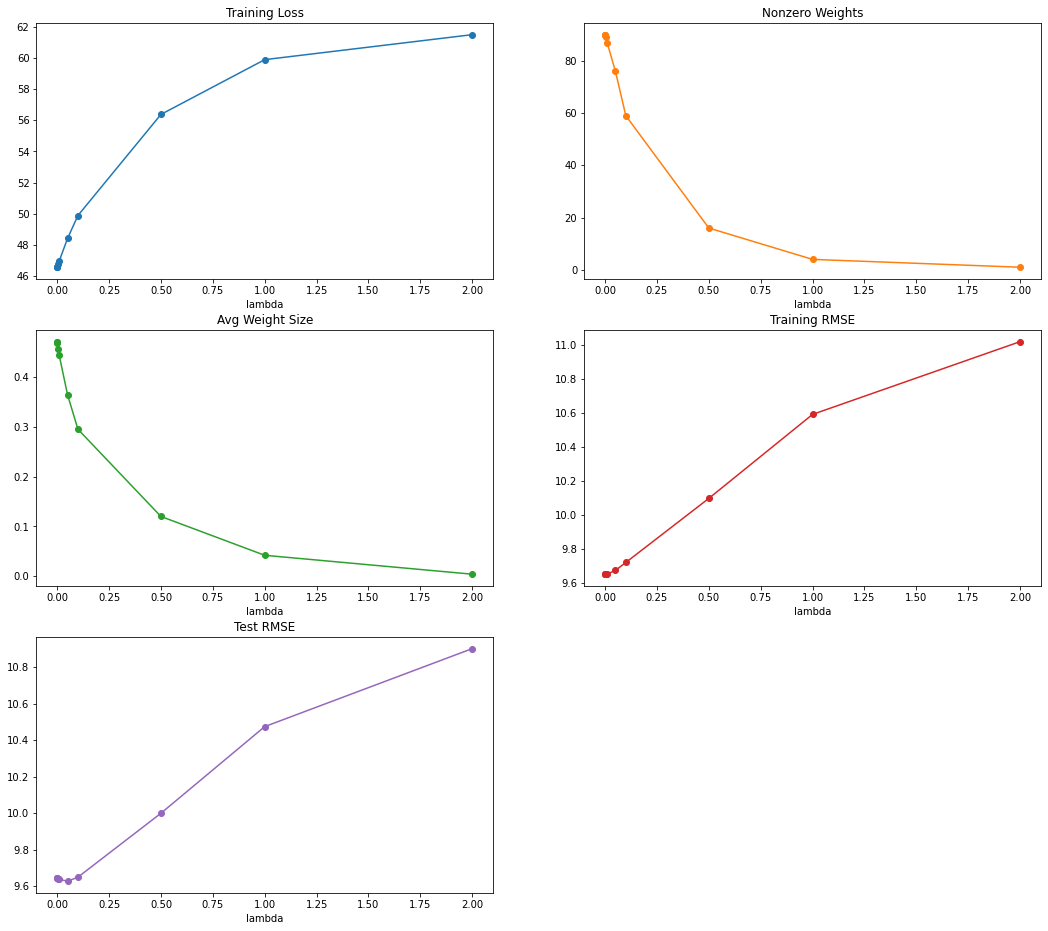

In [59]:
result.plot(
  x = "lambda", 
  y = ["Training Loss", "Nonzero Weights", "Avg Weight Size", "Training RMSE", "Test RMSE"],
  title=["Training Loss", "Nonzero Weights", "Avg Weight Size", "Training RMSE", "Test RMSE"],
  sharex=False,
  kind="line",
  figsize = (18, 16),
  subplots=True, # make seperate plots for each column
  layout=(3, 2),
  legend=False,
  style=["-o", "-o", "-o", "-o", "-o"],
)

#### Observations
1. Training Loss, Training RMSE 隨著 $\lambda$ 增加而上升，可能是因為懲罰值較大讓一些係數變 0，因此沒辦法用比較小的值去配出較小的 loss
2. 非零權重數隨著 $\lambda$ 增加而下降，是因為 $\lambda$ 懲罰值越來越大讓多數的權重都被設為 0，只有少數明顯有用的權重可以存在
3. Average Weight Size 也隨著 $\lambda$ 增加而下降，原因與第二點相同，因此可以看到 $\lambda$ 提升後平均係數都變得越來越小
4. Test RMSE 在 $\lambda$ 一開始到約等於 0.05 時是下降的，然後隨著 $\lambda$ 上升而上升